<a href="https://colab.research.google.com/github/diakapoor/time_series_arima/blob/main/Times_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
import yfinance as yf

In [2]:
# Fetching data for Apple (AAPL) for the last 5 years
ticker = 'AAPL'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Preview the first few rows of the dataset
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02 00:00:00+00:00,40.568928,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03 00:00:00+00:00,40.561867,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04 00:00:00+00:00,40.750271,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05 00:00:00+00:00,41.214230,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08 00:00:00+00:00,41.061153,43.587502,43.902500,43.482498,43.587502,82271200


Computing Daily Returns

In [4]:
import pandas as pd

In [5]:
#Assuming 'data' is a DataFrame with 'Adj Close' column for adjusted closing prices
data['Daily Return'] = data['Adj Close'].pct_change()

#Display the first few rows
print(data[['Adj Close','Daily Return']].head())

Price                      Adj Close Daily Return
Ticker                          AAPL             
Date                                             
2018-01-02 00:00:00+00:00  40.568928          NaN
2018-01-03 00:00:00+00:00  40.561867    -0.000174
2018-01-04 00:00:00+00:00  40.750271     0.004645
2018-01-05 00:00:00+00:00  41.214230     0.011385
2018-01-08 00:00:00+00:00  41.061153    -0.003714


In [6]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Daily Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2022-12-23 00:00:00+00:00,130.631363,131.860001,132.419998,129.639999,130.919998,63814900,-0.002798
2022-12-27 00:00:00+00:00,128.818405,130.029999,131.410004,128.720001,131.380005,69007800,-0.013878
2022-12-28 00:00:00+00:00,124.865585,126.040001,131.029999,125.870003,129.669998,85438400,-0.030685
2022-12-29 00:00:00+00:00,128.402313,129.610001,130.479996,127.730003,127.989998,75703700,0.028324
2022-12-30 00:00:00+00:00,128.719345,129.929993,129.949997,127.430000,128.410004,77034200,0.002469


In [7]:
# Resampling to monthly frequency
monthly_data = data['Adj Close'].resample('M').last()

<ipython-input-7-612e37f0761a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Adj Close'].resample('M').last()


In [8]:
# Preview the resampled data
print(monthly_data.head())

Ticker                          AAPL
Date                                
2018-01-31 00:00:00+00:00  39.431419
2018-02-28 00:00:00+00:00  42.120052
2018-03-31 00:00:00+00:00  39.674938
2018-04-30 00:00:00+00:00  39.079052
2018-05-31 00:00:00+00:00  44.359547


In [9]:
monthly_data.head()

Ticker,AAPL
Date,
2018-01-31 00:00:00+00:00,39.431419
2018-02-28 00:00:00+00:00,42.120052
2018-03-31 00:00:00+00:00,39.674938
2018-04-30 00:00:00+00:00,39.079052
2018-05-31 00:00:00+00:00,44.359547


In [10]:
# Missing Value check
monthly_data.isna().sum

<bound method DataFrame.sum of Ticker                      AAPL
Date                            
2018-01-31 00:00:00+00:00  False
2018-02-28 00:00:00+00:00  False
2018-03-31 00:00:00+00:00  False
2018-04-30 00:00:00+00:00  False
2018-05-31 00:00:00+00:00  False
2018-06-30 00:00:00+00:00  False
2018-07-31 00:00:00+00:00  False
2018-08-31 00:00:00+00:00  False
2018-09-30 00:00:00+00:00  False
2018-10-31 00:00:00+00:00  False
2018-11-30 00:00:00+00:00  False
2018-12-31 00:00:00+00:00  False
2019-01-31 00:00:00+00:00  False
2019-02-28 00:00:00+00:00  False
2019-03-31 00:00:00+00:00  False
2019-04-30 00:00:00+00:00  False
2019-05-31 00:00:00+00:00  False
2019-06-30 00:00:00+00:00  False
2019-07-31 00:00:00+00:00  False
2019-08-31 00:00:00+00:00  False
2019-09-30 00:00:00+00:00  False
2019-10-31 00:00:00+00:00  False
2019-11-30 00:00:00+00:00  False
2019-12-31 00:00:00+00:00  False
2020-01-31 00:00:00+00:00  False
2020-02-29 00:00:00+00:00  False
2020-03-31 00:00:00+00:00  False
2020-04-30 00:00:00+00:00  False
2020-05-31 00:00:00+00:00  False
2020-06-30 00:00:00+00:00  False
2020-07-31 00:00:00+00:00  False
2020-08-31 00:00:00+00:00  False
2020-09-30 00:00:00+00:00  False
2020-10-31 00:00:00+00:00  False
2020-11-30 00:00:00+00:00  False
2020-12-31 00:00:00+00:00  False
2021-01-31 00:00:00+00:00  False
2021-02-28 00:00:00+00:00  False
2021-03-31 00:00:00+00:00  False
2021-04-30 00:00:00+00:00  False
2021-05-31 00:00:00+00:00  False
2021-06-30 00:00:00+00:00  False
2021-07-31 00:00:00+00:00  False
2021-08-31 00:00:00+00:00  False
2021-09-30 00:00:00+00:00  False
2021-10-31 00:00:00+00:00  False
2021-11-30 00:00:00+00:00  False
2021-12-31 00:00:00+00:00  False
2022-01-31 00:00:00+00:00  False
2022-02-28 00:00:00+00:00  False
2022-03-31 00:00:00+00:00  False
2022-04-30 00:00:00+00:00  False
2022-05-31 00:00:00+00:00  False
2022-06-30 00:00:00+00:00  False
2022-07-31 00:00:00+00:00  False
2022-08-31 00:00:00+00:00  False
2022-09-30 00:00:00+00:00  False
2022-10-31 00:00:00+00:00  False
2022-11-30 00:00:00+00:00  False
2022-12-31 00:00:00+00:00  False>

In [11]:
# Somtimes resampling can introduce missing data, especially when resampling to lower frequencies

ffill() (Forward Fill): Fills missing values with the previous valid value

In [12]:
monthly_data = data['Adj Close'].resample('M').last().ffill()
# M is now getting replaced with ME

<ipython-input-12-3ba49aa84666>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Adj Close'].resample('M').last().ffill()


Bfill() (BackwardFill): Fills mising values with the next valid value

In [13]:
monthly_data = data['Adj Close'].resample('M').last().bfill()

<ipython-input-13-8349dbc6710d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Adj Close'].resample('M').last().bfill()


interploate(): Fills missing values using linear interpolation or other methods

In [14]:
monthly_data = data['Adj Close'].resample('M').mean().interpolate(methods='linear')

<ipython-input-14-6fbc8ba1e05f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Adj Close'].resample('M').mean().interpolate(methods='linear')


In [15]:
# Summary statistics for the adjusted close prices
summary_stats = data['Adj Close'].describe()
print(summary_stats)

Ticker         AAPL
count   1259.000000
mean      95.913522
std       46.240692
min       33.989887
25%       49.046963
50%       89.386223
75%      140.842422
max      179.273605


In [16]:
import matplotlib.pyplot as plt


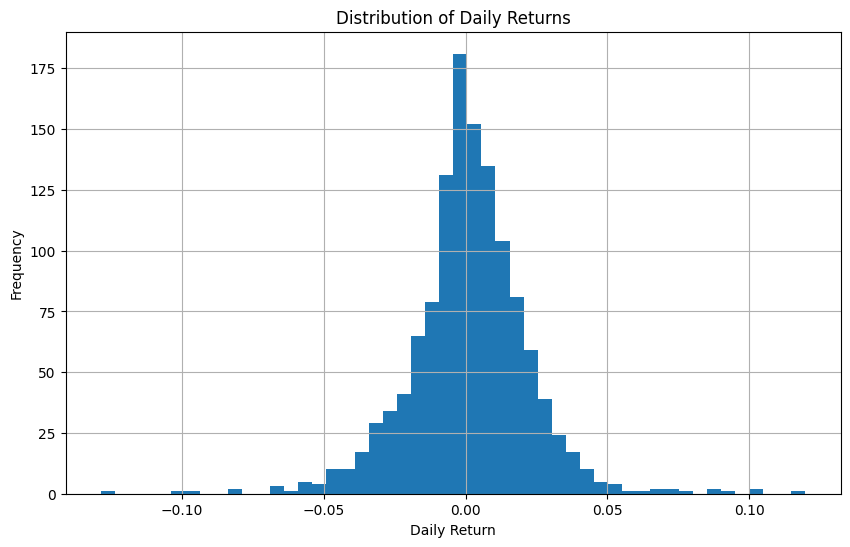

In [17]:
# Histogram for daily returns
data['Daily Return'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

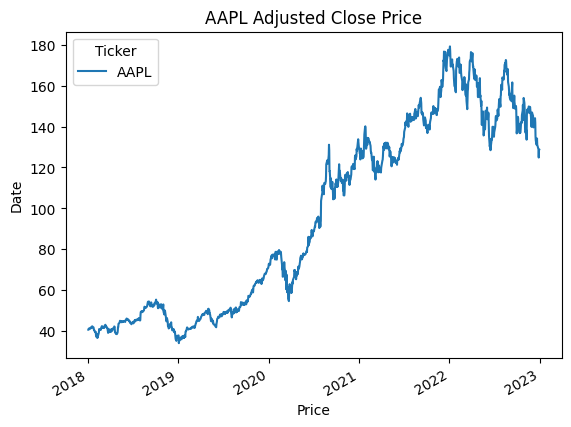

In [18]:
# Plotting the adjusted close price
plt.figure(figsize=(10,6))
data['Adj Close'].plot()

#polt.plot(x,y)
plt.title('AAPL Adjusted Close Price')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()
# Trend

<function matplotlib.pyplot.show(close=None, block=None)>

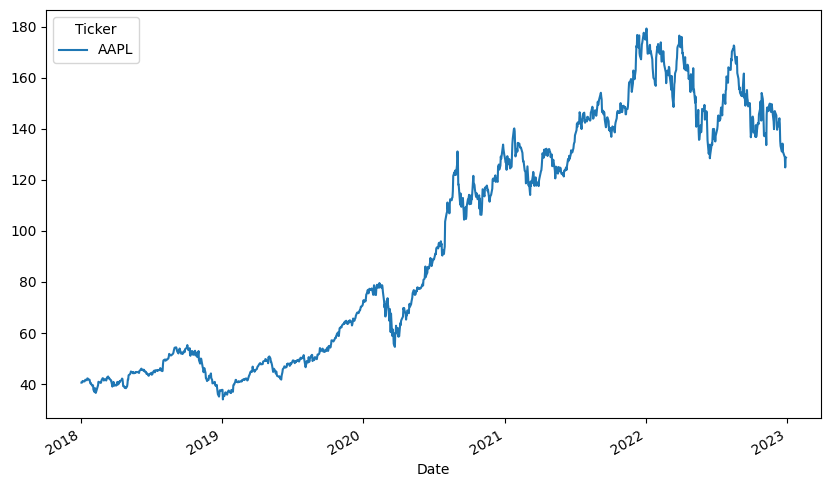

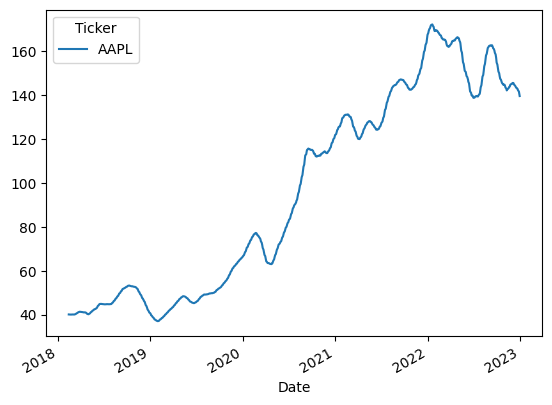

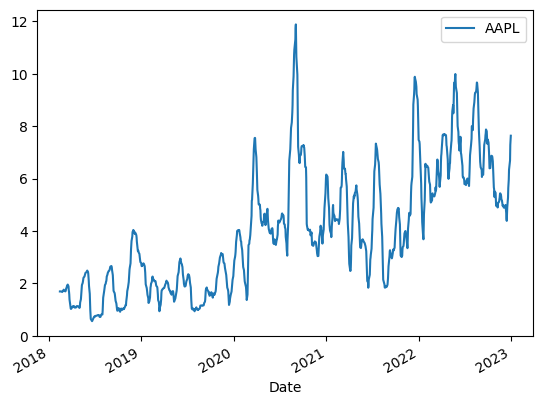

In [19]:
# Plot rolling mean and standard deviation
data['Adj Close'].plot(label='Original', figsize=(10,6))
#line plot of original stock prices

data['Adj Close'].rolling(window=30).mean().plot(label='30-Day Moving Average')
#Line plot rolling mean values

data['Adj Close'].rolling(window=30).std().plot(label='30-Day Moving Std')
plt.legend()
plt.show

In [20]:
# Resample to weekly frequency, then apply rolling mean
weekly_rolling = data['Adj Close'].resample('W').mean().rolling(window=4).mean()
print(weekly_rolling.head())

Ticker                          AAPL
Date                                
2018-01-07 00:00:00+00:00        NaN
2018-01-14 00:00:00+00:00        NaN
2018-01-21 00:00:00+00:00        NaN
2018-01-28 00:00:00+00:00  41.251115
2018-02-04 00:00:00+00:00  40.838855


In [21]:
# Check for missing values
missing_values = data.isnull().sum() #isnull or isna
print(missing_values)

Price         Ticker
Adj Close     AAPL      0
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
Daily Return            1
dtype: int64


In [22]:
weekly_rolling.isnull().sum()

,0
Ticker,
AAPL,3


In [23]:
# Fill missing values using backward fill
data_filled = data.fillna(method='bfill')

# Check if missing values still exist
print(data_filled.isnull().sum())


Price         Ticker
Adj Close     AAPL      0
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
Daily Return            0
dtype: int64


<ipython-input-23-e0efeb716d36>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='bfill')


In [24]:

from scipy import stats #scientific python

# Drop missing values form 'Daily Return' and calculate z-score
daily_returns_clean = data['Daily Return'].dropna()
z_scores = stats.zscore(daily_returns_clean)

# Define a threshold for outliers (absolute Z-score > 3)
outliers = daily_returns_clean[abs(z_scores)>3]

# Display the outliers
print(outliers)


Date
2018-11-02 00:00:00+00:00   -0.066331
2018-12-26 00:00:00+00:00    0.070421
2019-01-03 00:00:00+00:00   -0.099608
2019-01-30 00:00:00+00:00    0.068335
2020-02-27 00:00:00+00:00   -0.065368
2020-03-02 00:00:00+00:00    0.093101
2020-03-09 00:00:00+00:00   -0.079092
2020-03-10 00:00:00+00:00    0.072021
2020-03-12 00:00:00+00:00   -0.098755
2020-03-13 00:00:00+00:00    0.119809
2020-03-16 00:00:00+00:00   -0.128647
2020-03-20 00:00:00+00:00   -0.063485
2020-03-24 00:00:00+00:00    0.100325
2020-04-06 00:00:00+00:00    0.087237
2020-07-31 00:00:00+00:00    0.104689
2020-09-03 00:00:00+00:00   -0.080061
2020-09-08 00:00:00+00:00   -0.067295
2022-01-28 00:00:00+00:00    0.069778
2022-10-28 00:00:00+00:00    0.075553
2022-11-10 00:00:00+00:00    0.088975
Name: Daily Return, dtype: float64


In [25]:
# Define a threshold value for outliers, for example, 5% (0.05)
threshold = 0.05 #significance level

# Use the clip function to limit the 'Daily Return' column to this range
# Any value above 5% is capped to 5%, and any value below -5% is capped to -5%
data['Daily Return'] = data['Daily Return'].clip(lower=threshold, upper = threshold)

# Now, print the statistics of the 'Daily Return' column to see the effect
print(data['Daily Return'].describe())

count    1.258000e+03
mean     5.000000e-02
std      1.145373e-15
min      5.000000e-02
25%      5.000000e-02
50%      5.000000e-02
75%      5.000000e-02
max      5.000000e-02
Name: Daily Return, dtype: float64


In [26]:
from datetime import datetime, timedelta
datetime.now()

datetime.datetime(2024, 10, 25, 18, 59, 12, 366964)

In [27]:
from datetime import datetime, timedelta

# Calculate the start date as 3 years from today
start_date = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

# Use yfinance to download the data
data = yf.download('AAPL',start = start_date, end=end_date)

# Display the first few rows of data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2021-10-26 00:00:00+00:00,146.860748,149.320007,150.839996,149.009995,149.330002,60893400
2021-10-27 00:00:00+00:00,146.398483,148.850006,149.729996,148.490005,149.360001,56094900
2021-10-28 00:00:00+00:00,150.057236,152.570007,153.169998,149.720001,149.820007,100077900
2021-10-29 00:00:00+00:00,147.332855,149.800003,149.940002,146.410004,147.220001,124953200
2021-11-01 00:00:00+00:00,146.506683,148.960007,149.699997,147.800003,148.990005,74588300


In [28]:
# Calculate start and end dates for the last 3 years
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=365*3)).strftime('%Y-%m-%d')

# List of Tickers for apple and Alphabet (Google)
tickers = ['MSFT','GOOG']

# Download stock data
data = yf.download(tickers, start= start_date, end = end_date)

# Save the 'Adj Close' prices to a csv file
adj_close_prices = data['Adj Close']
adj_close_prices.head()

[*********************100%***********************]  2 of 2 completed


Ticker,GOOG,MSFT
Date,,
2021-10-26 00:00:00+00:00,139.329834,302.322510
2021-10-27 00:00:00+00:00,146.068787,315.054565
2021-10-28 00:00:00+00:00,145.771011,316.204956
2021-10-29 00:00:00+00:00,147.907257,323.292389
2021-11-01 00:00:00+00:00,143.421783,321.098907


In [29]:
adj_close_prices.to_csv('MSFT_GOOGL_Last_3_years.csv')

print('Data saved to MSFT_GOOGL_Last_3_years.csv')

Data saved to MSFT_GOOGL_Last_3_years.csv


Visualisation of Time Series data

In [30]:
import pandas as pd #import package
df = pd.read_csv("/content/MSFT_GOOGL_Last_3_years.csv")
print(df)

                          Date        GOOG        MSFT
0    2021-10-26 00:00:00+00:00  139.329834  302.322510
1    2021-10-27 00:00:00+00:00  146.068787  315.054565
2    2021-10-28 00:00:00+00:00  145.771011  316.204956
3    2021-10-29 00:00:00+00:00  147.907257  323.292389
4    2021-11-01 00:00:00+00:00  143.421783  321.098907
..                         ...         ...         ...
749  2024-10-18 00:00:00+00:00  165.050003  418.160004
750  2024-10-21 00:00:00+00:00  165.800003  418.779999
751  2024-10-22 00:00:00+00:00  166.820007  427.510010
752  2024-10-23 00:00:00+00:00  164.479996  424.600006
753  2024-10-24 00:00:00+00:00  164.529999  424.730011

[754 rows x 3 columns]


In [31]:

#summary of dataframe or data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    754 non-null    object 
 1   GOOG    754 non-null    float64
 2   MSFT    754 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.8+ KB


In [32]:
df['Date'] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    754 non-null    datetime64[ns, UTC]
 1   GOOG    754 non-null    float64            
 2   MSFT    754 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 17.8 KB


In [33]:
df["Date"] = df["Date"].dt.date
df.head()

,Date,GOOG,MSFT
0,2021-10-26,139.329834,302.322510
1,2021-10-27,146.068787,315.054565
2,2021-10-28,145.771011,316.204956
3,2021-10-29,147.907257,323.292389
4,2021-11-01,143.421783,321.098907


In [34]:
df.dtypes

,0
Date,object
GOOG,float64
MSFT,float64


In [35]:
df['Date'] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    754 non-null    datetime64[ns]
 1   GOOG    754 non-null    float64       
 2   MSFT    754 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 17.8 KB


In [36]:
df.dtypes

,0
Date,datetime64[ns]
GOOG,float64
MSFT,float64


In [37]:
# set date as an index column
df.set_index("Date", inplace = True)
df.head()

,GOOG,MSFT
Date,,
2021-10-26,139.329834,302.322510
2021-10-27,146.068787,315.054565
2021-10-28,145.771011,316.204956
2021-10-29,147.907257,323.292389
2021-11-01,143.421783,321.098907


In [38]:
# Replacement of missing values if any
mean = df ["MSFT"].mean()

df["MSFT"].fillna(mean,inplace= True)


<ipython-input-38-6a3417a98c96>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MSFT"].fillna(mean,inplace= True)


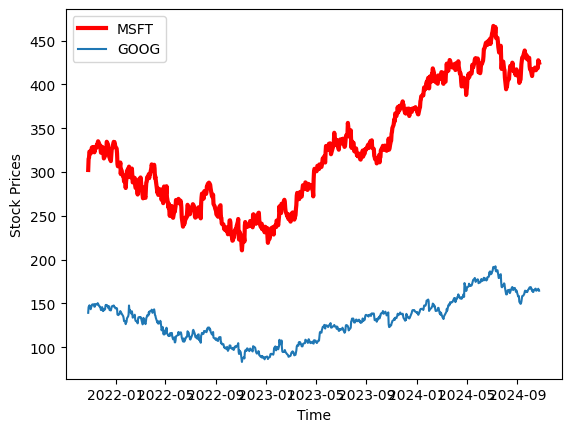

In [39]:
# Importing matplotlib module
import matplotlib.pyplot as plt

#line plt bw time adn MSFT prices
plt.plot(df.index,df["MSFT"], color='r', linewidth=3, label='MSFT')

# Line plot bw time and Google prices
plt.plot(df.index, df["GOOG"], label = "GOOG")

plt.xlabel("Time")
plt.ylabel("Stock Prices")
plt.legend()
plt.show()

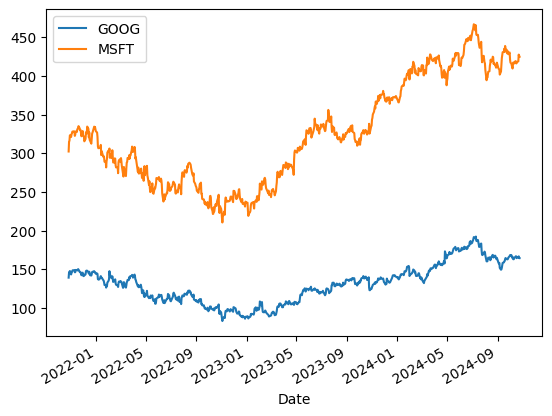

In [40]:
# pandas visualisation
df.plot()
plt.show()

In [41]:
df.head()

,GOOG,MSFT
Date,,
2021-10-26,139.329834,302.322510
2021-10-27,146.068787,315.054565
2021-10-28,145.771011,316.204956
2021-10-29,147.907257,323.292389
2021-11-01,143.421783,321.098907


In [42]:
#slicing based on index (date)
df_subset = df["2021":"2022"]
print(df_subset)

                  GOOG        MSFT
Date                              
2021-10-26  139.329834  302.322510
2021-10-27  146.068787  315.054565
2021-10-28  145.771011  316.204956
2021-10-29  147.907257  323.292389
2021-11-01  143.421783  321.098907
...                ...         ...
2022-12-23   89.589981  235.345566
2022-12-27   87.714592  233.600662
2022-12-28   86.248192  231.205109
2022-12-29   88.732086  237.593231
2022-12-30   88.512634  236.420120

[298 rows x 2 columns]


benefit of using date as an index, slicing can be done easily, xaxis. it automatically getting extracted. cause index

<Axes: xlabel='Date'>

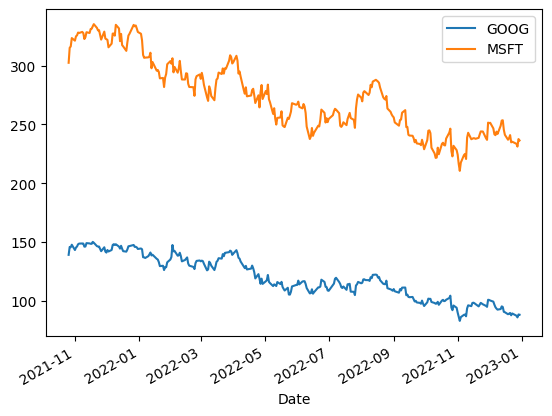

In [43]:
df_subset.plot()

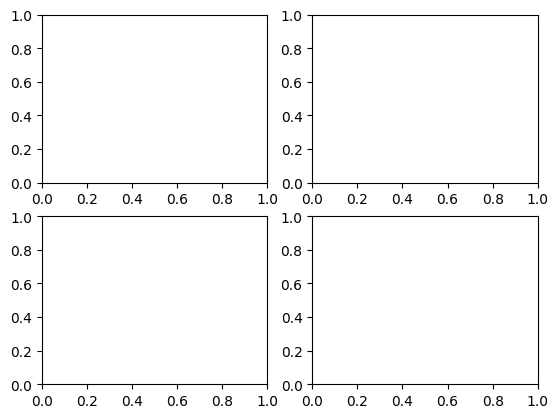

In [44]:
# fig and axis declaration
fig, ax = plt.subplots(2,2)


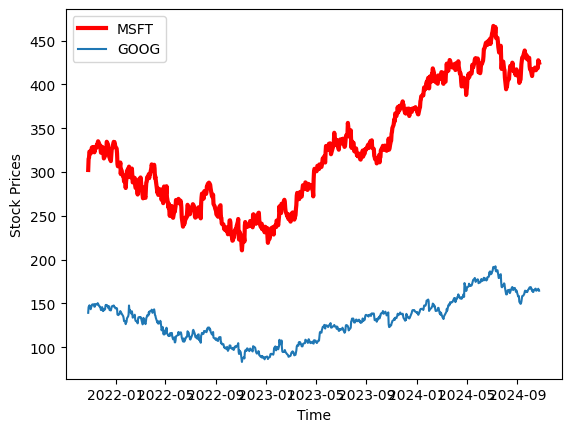

In [45]:
# Declaration of fig and axis
fig, ax = plt.subplots()

# line plt bw time and MSFT prices
ax.plot(df.index,df["MSFT"],color='r',linewidth=3, label="MSFT")

# Line plot be time and Google prices
ax.plot(df.index,df["GOOG"],label="GOOG")

ax.set_xlabel("Time")
ax.set_ylabel("Stock Prices")
ax.legend()
plt.show()

Matplotlib can be used in 2 ways. one is what we already did, this is known as plt style. Number 2 OOP STYLE. Object Oriented (Flexible). the figure and axis has to be declared cause it is not detected automatically.

In [46]:
df_subset.head()

,GOOG,MSFT
Date,,
2021-10-26,139.329834,302.322510
2021-10-27,146.068787,315.054565
2021-10-28,145.771011,316.204956
2021-10-29,147.907257,323.292389
2021-11-01,143.421783,321.098907


Adding vertical and horizontal lines in the plot


/usr/local/lib/python3.10/dist-packages/matplotlib/axis.py:1732: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)
/usr/local/lib/python3.10/dist-packages/matplotlib/axis.py:1732: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)


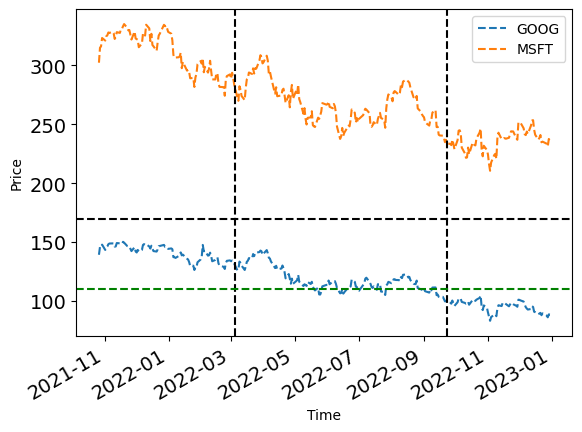

In [47]:
import matplotlib.pyplot as plt

ax = df_subset.plot(fontsize=14, linestyle="--")

ax.set_xlabel("Time")
ax.set_ylabel("Price")

ax.axvline("05-March-22", color="black", linestyle="--")
ax.axvline("23-September-22", color="black", linestyle="--")

ax.axhline(110, color="green", linestyle = "--")
ax.axhline(170, color="k", linestyle= "--")

plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/axis.py:1732: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ret = self.converter.convert(x, self.units, self)


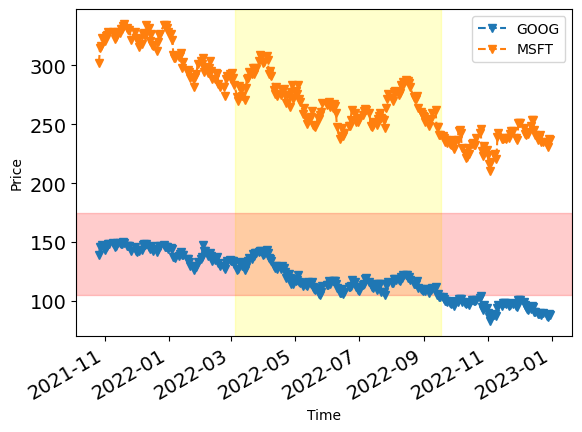

In [48]:
ax = df_subset.plot(fontsize=14, marker="v", linestyle="--")

ax.set_xlabel("Time")
ax.set_ylabel("Price")

ax.axvspan("05-March-22","17-September-22", color="yellow", alpha=0.2)


ax.axhspan(105,175, color="red", alpha=0.2)


plt.show()

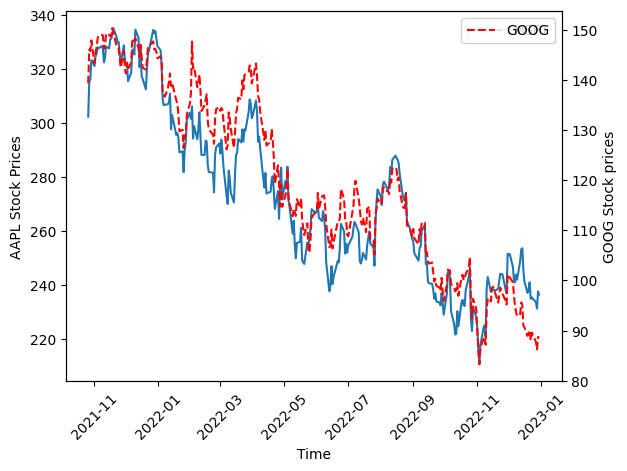

In [49]:
# Twin axes with different left and right scales (oop stlying only supports this)

fig, ax = plt.subplots()

# First line plot
ax.plot(df_subset.index, df_subset["MSFT"], label="MSFT")

ax.set_xlabel("Time")
ax.set_ylabel("AAPL Stock Prices") #left y labels
ax.legend()
plt.xticks(rotation=45)

ax2 = ax.twinx() #instantiating twin axes

ax2.plot(df_subset.index,df_subset["GOOG"], color="red", linestyle="--", label ="GOOG")

#Separating variables by color
ax2.set_ylabel("GOOG Stock prices") #right y labels
ax2.legend()
plt.show()

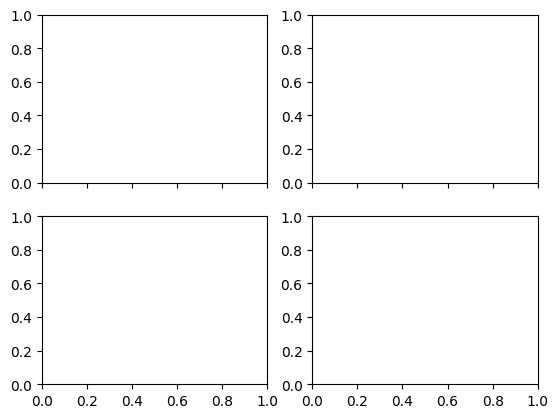

In [50]:
fig,ax = plt.subplots(2,2, sharex = True)

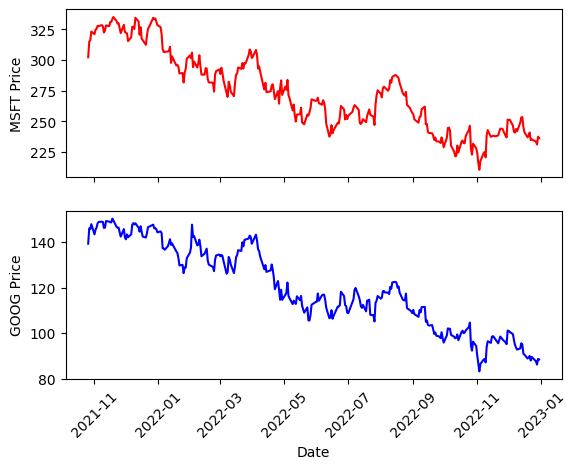

In [51]:
plt.subplots
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(df_subset.index,df_subset["MSFT"], color="r")
ax[1].plot(df_subset.index,df_subset["GOOG"], color="b")

ax[0].set_ylabel("MSFT Price")

ax[1].set_ylabel("GOOG Price")
ax[1].set_xlabel("Date")

plt.tick_params("x",rotation=45)
plt.show()

Time Series Forecasting

Decomposing Time series

Trend : Long Term movement

Fluctuations/Residual : random noise or irregular fluctuations

Patterns : Repeating patterns at regular intervals


In [56]:
appl_data = pd.read_csv("/aapl.csv")
appl_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568932,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561863,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750267,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214233,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061150,82271200


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

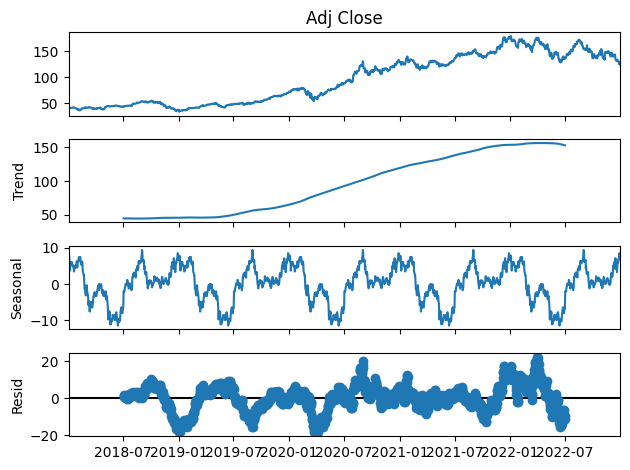

In [57]:
# Convert the "Date" column to datetime and set it as the index
appl_data["Date"] = pd.to_datetime(appl_data["Date"])
appl_data.set_index("Date", inplace = True)

# Extract the 'Adj Close' column for the time series analysis
adj_close = appl_data["Adj Close"]

# Resample the data to daily frequency
adj_close = adj_close.asfreq("D", method="pad")

# Perfom seasonal decomcomposition of the time series
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series
decomposition = seasonal_decompose(adj_close, model="additive", period=365)

# Plot the decomposition results

plt.figure(figsize=(12,8))
decomposition.plot() #Line plots
plt.show

Augumented Dickey Fuller

In [58]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Adj Close' series
adf_result = adfuller(adj_close)

# Extracting the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

adf_statistic, p_value, critical_values

#if the p value is less than .05 (5%) that means you are lying in the rejection zone (reject the hypothesis)
#if the p value is more than .05 (5%) that means you are lying in the 95% zone (confidence level) (fail to reject the hypothesis)
#hypothesis is that the data is not stationary (we need stationary data - mean constant, standard deviation constant and covariance constant)

(-1.1648617981527067,
 0.6885257701272014,
 {'1%': -3.4339921916016345,
  '5%': -2.8631488249300574,
  '10%': -2.5676264862577503})

Data is non stationary

Differencing

Autocorrelation Function (ACF) plot to determine the appropriate differencing steps

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x600 with 0 Axes>

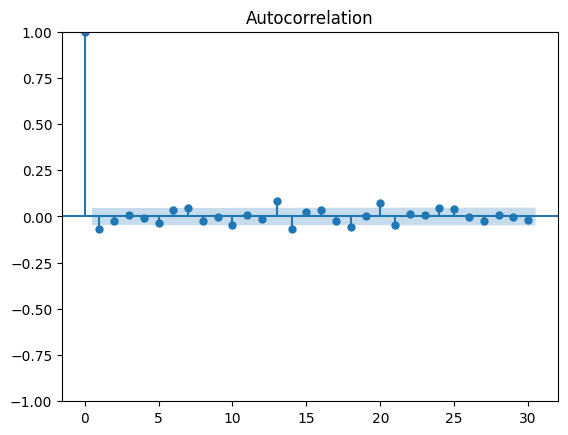

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Perform first differencing
adj_close_diff = adj_close.diff().dropna()

# Plot ACF for differenced data
plt.figure(figsize=(8,6))
plot_acf(adj_close_diff, lags=30)
plt.show

Determining right order of Differencing

ARIMA MODELLING

in all alogortithms there is one assumption that there is no dependency.

but in time series there must be dependency

3 parameters
(Autoregressive Integrated Moving Averages)

p: The number of lag observations (autoregressive term) (how many lags would act as independent variables)

d: The number of times the series needs to be differenced (how many degree of differencing is required) (d=2 very rarely, d=1 mostly) to make data stationary

q: The size of the moving average window (Moving Average term)


why does it beat every other model in time series?
prediction error (Actual - predicted) known as residulas

you sum em' up. (why do we square? magnify, nullify the sign) Sum of squared error

no algorithim so far that takes residuals into consideration

y = mx + c + e (e represents error term)

why errors are coming? why is there error when we think x is the only variable affecting y. there must be some other factors that are not part of the equation. Certain factors which are qualitative value. so we call them as UNIDENTIFIED FACTORS.

they generate errors or residuals


lag variable
we need lag residuals

lag of y + lag of residuals

number of lags of residuals is q


determine p and q value using Partial Autocorrelation Function

Hyper parameter tunning or hyper tunning or grid search.. random ice search
(feeding the hyper parameter mannually to the model)

Hyper paramenter, arguments or assumptions which you feed to the models without which they cannot work

Auto ARIMA

In [60]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.7 MB/s eta 0:00:00


In [61]:
adj_close.index[-1]

Timestamp('2022-12-30 00:00:00')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7349.977, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7344.242, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7343.779, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7349.271, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7344.705, Time=0.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7344.544, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7346.469, Time=3.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7343.275, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7344.298, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7344.119, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7343.715, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7346.029, Time=0.46 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 7.471 seconds
                               SARIMAX Results                                
Dep. Vari

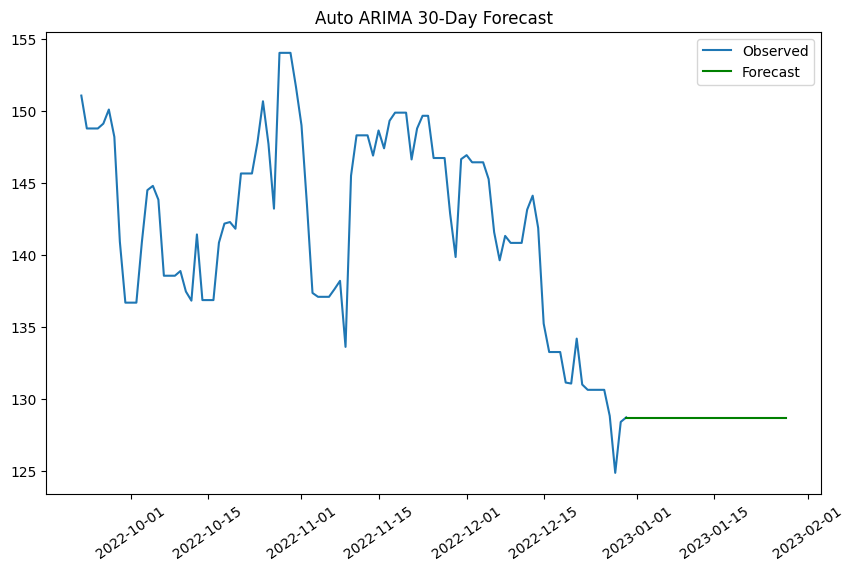

In [62]:
import pmdarima as pm

# Run auto_arima to find the best ARIMA MODEL
auto_model = pm.auto_arima(adj_close,
                           start_p=0, start_q=0,
                           test='adf',
                           max_p= 5, max_q=5,
                           seasonal= False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print the summary of the best model
print(auto_model.summary())

# Forecast the next 30 days using the best ARIMA model
forecast = auto_model.predict(n_periods = 30)

# Plot the Forecast
plt.figure(figsize= (10,6))

# line Plot of original data
plt.plot(adj_close.index[-100:], adj_close[-100:], label = "Observed")

plt.plot(pd.date_range(adj_close.index[-1], periods = 30 , freq = 'D'), forecast , label = "Forecast", color = 'green')
plt.title('Auto ARIMA 30-Day Forecast')
plt.legend()
plt.xticks(rotation = 35)
plt.show()

Jarque Bera (test of normality)
Homoskedasticity: When the variance of the errors remains constant across all levels of the independent variable(s). In other words, the spread of the errors doesn't change as the value of the predictor(s) changes. Homoskedasticity is a desirable property in regression models, as it implies that the model's predictions are consistent and reliable across the range of the independent variables.
Heteroskedasticity: When the variance of the errors changes (increases or decreases) as the independent variable(s) change. This situation can lead to inefficient estimates and invalid hypothesis tests in regression analysis, requiring adjustments to correct for the varying error variances.


Model diagnostic (amount of confidence I can place on ARIMA)

Standardised Residual (will look for normality whether these are stationary or not)

Histogram and density plots

Correlogram when histogram and normal distribution are ploted together (good one is where residulas are not correlated)

Quantile (if dots are lying on the red lines that means residuals stationary) the amount of relaibitliy that I can place on my model goes down


We tend to understand the amount of dependency, confidence or relaibility that we can place on the model


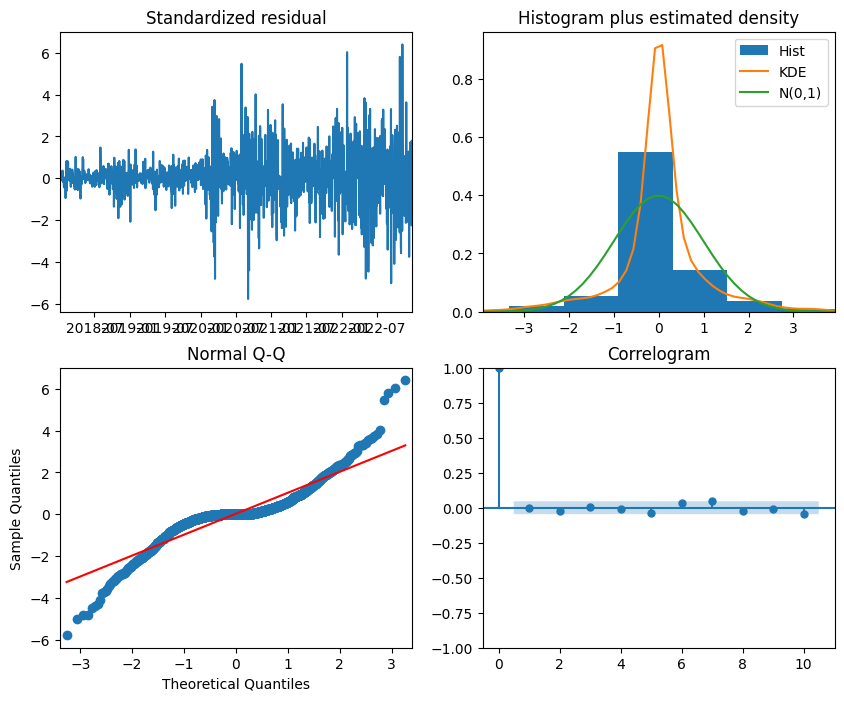

In [63]:
auto_model.plot_diagnostics(figsize = (10,8))
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8587.667, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7977.851, Time=0.76 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.73 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8567.473, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7806.284, Time=1.47 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=7721.644, Time=2.99 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=22.45 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=12.98 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=7734.569, Time=2.18 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=7723.452, Time=3.54 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=7723.517, Time=8.68 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=7721.521, Time=2.84 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=7805.907, Time=1.34 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=inf, Time=28.01 sec
 ARIMA(0,1,1)(2,1,1)[12]            

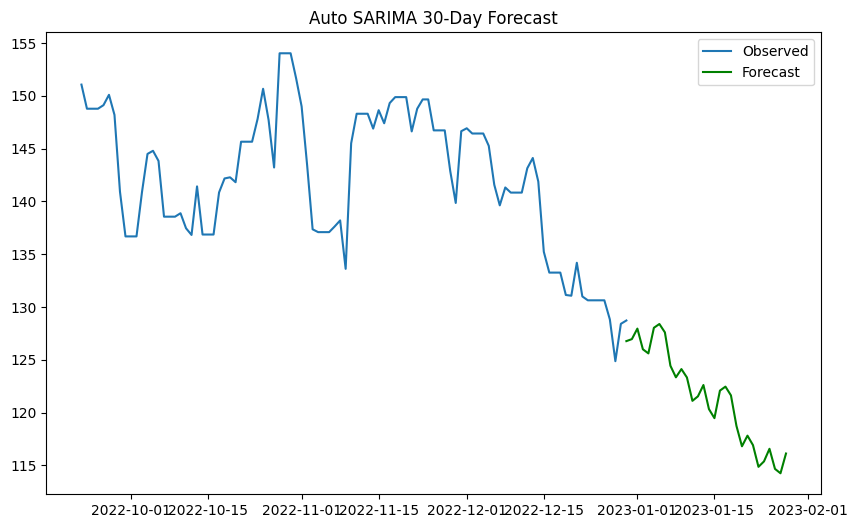

In [64]:
import pmdarima as pm

# Run auto_arima to find the best ARIMA MODEL
auto_sarima = pm.auto_arima(adj_close,
                           seasonal= True,
                           m=12, #Assuming monthly seasonality
                           start_p=0, start_q=0,
                           test='adf',
                           max_p= 3, max_q=3,
                           start_P=0, start_Q=0,
                           max_P=3, max_Q=3,
                           d=1, D=1, #we dont want differenciation to go above 1 when we consider seasonality
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print the summary of the best model
print(auto_sarima.summary())

# Forecast the next 30 days using the best ARIMA model
forecast_sarima = auto_sarima.predict(n_periods = 30)

# Plot the Forecast
plt.figure(figsize= (10,6))

# line Plot of original data
plt.plot(adj_close.index[-100:], adj_close[-100:], label = "Observed")

plt.plot(pd.date_range(adj_close.index[-1], periods = 30 , freq = 'D'), forecast_sarima , label = "Forecast", color = 'green')
plt.title('Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()




Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=8608.973, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=8103.182, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=1.15 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=8606.321, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=7881.199, Time=0.42 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=7726.205, Time=0.62 sec
 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=3.12 sec
 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=2.18 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=7736.448, Time=0.49 sec
 ARIMA(2,1,0)(3,1,0)[4]             : AIC=7727.990, Time=1.31 sec
 ARIMA(1,1,1)(3,1,0)[4]             : AIC=7727.992, Time=3.93 sec
 ARIMA(0,1,1)(3,1,0)[4]             : AIC=7726.518, Time=0.64 sec
 ARIMA(2,1,1)(3,1,0)[4]             : AIC=7729.981, Time=2.01 sec
 ARIMA(1,1,0)(3,1,0)[4] intercept   : AIC=7728.198, Time=1.92 sec

Best model:  ARIMA(1,1,0)(3,1,0)[4]          
T

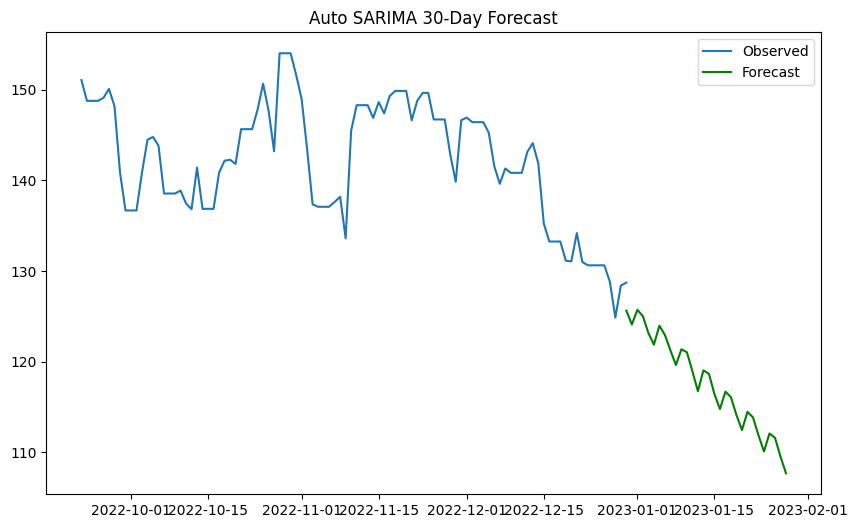

In [65]:
import pmdarima as pm

# Run auto_arima to find the best ARIMA MODEL
auto_sarima = pm.auto_arima(adj_close,
                           seasonal= True,
                           m=4, #Assuming monthly seasonality
                           start_p=0, start_q=0,
                           test='adf',
                           max_p= 3, max_q=3,
                           start_P=0, start_Q=0,
                           max_P=3, max_Q=3,
                           d=1, D=1, #we dont want differenciation to go above 1 when we consider seasonality
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print the summary of the best model
print(auto_sarima.summary())

# Forecast the next 30 days using the best ARIMA model
forecast_sarima = auto_sarima.predict(n_periods = 30)

# Plot the Forecast
plt.figure(figsize= (10,6))

# line Plot of original data
plt.plot(adj_close.index[-100:], adj_close[-100:], label = "Observed")

plt.plot(pd.date_range(adj_close.index[-1], periods = 30 , freq = 'D'), forecast_sarima , label = "Forecast", color = 'green')
plt.title('Auto SARIMA 30-Day Forecast')
plt.legend()
plt.show()


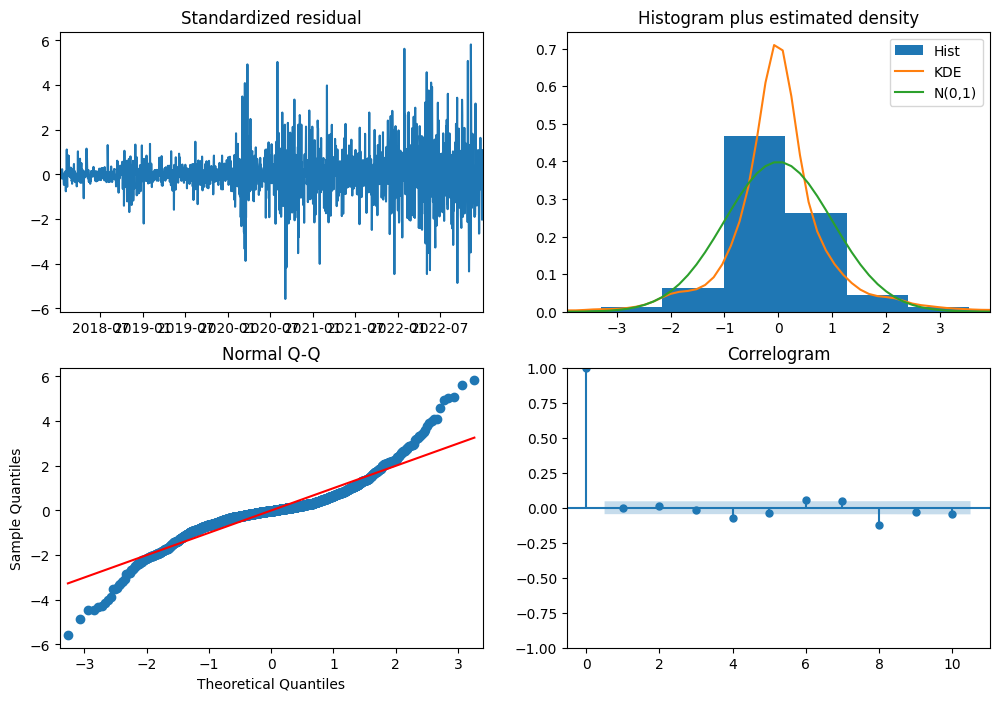

In [66]:
# Plot diagonistics of the fitted SARIMA model to check the residuals
auto_sarima.plot_diagnostics(figsize = (12,8))
plt.show()